# Analysis of Bike Sharing

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('./train_bikes.csv')
df['hour'] = df['datetime'].apply(lambda x: x.split(' ')[1]).apply(lambda x: int(x.split(':')[0]))
df['datetime'] = pd.to_datetime(df['datetime'])
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,1,1


In [93]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,2011.501929,6.521495,9.992559
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,0.500019,3.444373,5.476608
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2011.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,2011.000000,4.000000,5.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,2012.000000,7.000000,10.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,2012.000000,10.000000,15.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,2012.000000,12.000000,19.000000


## Data Visualization & Analysis

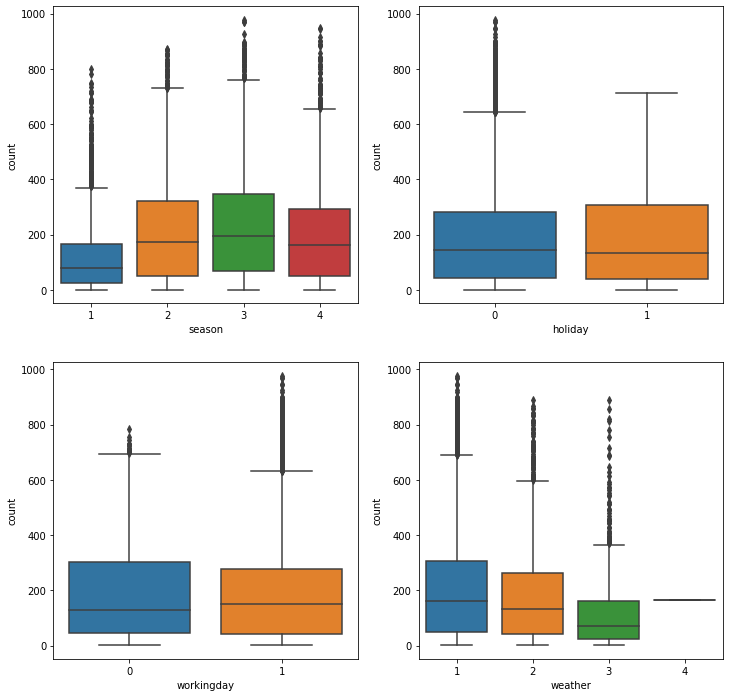

In [104]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))

sns.boxplot(x=df['season'], y=df['count'], ax=axes[0, 0])
sns.boxplot(x=df['holiday'], y=df['count'], ax=axes[0, 1])
sns.boxplot(x=df['workingday'], y=df['count'], ax=axes[1, 0])
sns.boxplot(x=df['weather'], y=df['count'], ax=axes[1, 1])

plt.show()

## Analysis of time/weather Factors
1. Season: Usages of bike sharing is lowest in 1st season and is higher in 2nd/3rd season.
2. Holiday: There is no significant difference between holidays and non-holidays.
3. WorkingDay: There is no significant difference between holidays and non-holidays.
4. Weather: Usages influence a lot by weather. 1st weather has highest usage and 3rd weather has lowest usage.

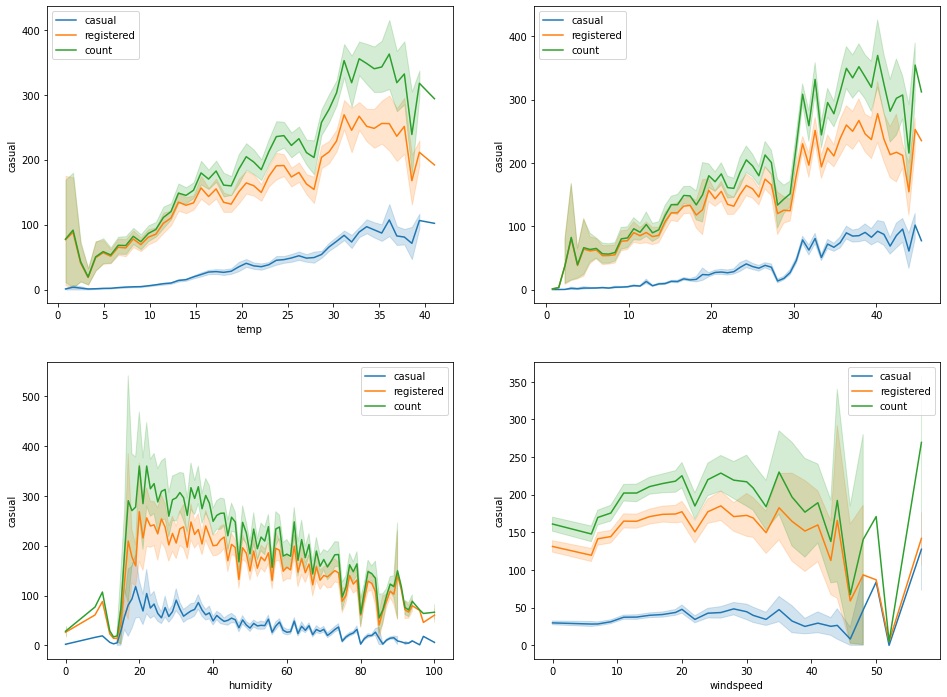

In [141]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))

sns.lineplot(x=df['temp'], y=df['casual'], ax=axes[0, 0], label='casual')
sns.lineplot(x=df['temp'], y=df['registered'], ax=axes[0, 0], label='registered')
sns.lineplot(x=df['temp'], y=df['count'], ax=axes[0, 0], label='count')
sns.lineplot(x=df['atemp'], y=df['casual'], ax=axes[0, 1], label='casual')
sns.lineplot(x=df['atemp'], y=df['registered'], ax=axes[0, 1], label='registered')
sns.lineplot(x=df['atemp'], y=df['count'], ax=axes[0, 1], label='count')
sns.lineplot(x=df['humidity'], y=df['casual'], ax=axes[1, 0], label='casual')
sns.lineplot(x=df['humidity'], y=df['registered'], ax=axes[1, 0], label='registered')
sns.lineplot(x=df['humidity'], y=df['count'], ax=axes[1, 0], label='count')
sns.lineplot(x=df['windspeed'], y=df['casual'], ax=axes[1, 1], label='casual')
sns.lineplot(x=df['windspeed'], y=df['registered'], ax=axes[1, 1], label='registered')
sns.lineplot(x=df['windspeed'], y=df['count'], ax=axes[1, 1], label='count')

plt.show()

## Analysis of Environment Factors

1. Temp: For 0-35 degree, the bike sharing usages increases by the temp. For 35+ degree, the bike sharing usages decreases by the temp.
2. Atemp: The bike sharing usages increases by the atemp. 
3. Humidity: If not consider the rare cases (very low humidity), the bike sharing usages decreases by the humidity.
4. WindSpeed: Moderate wind speed results in higher usages.

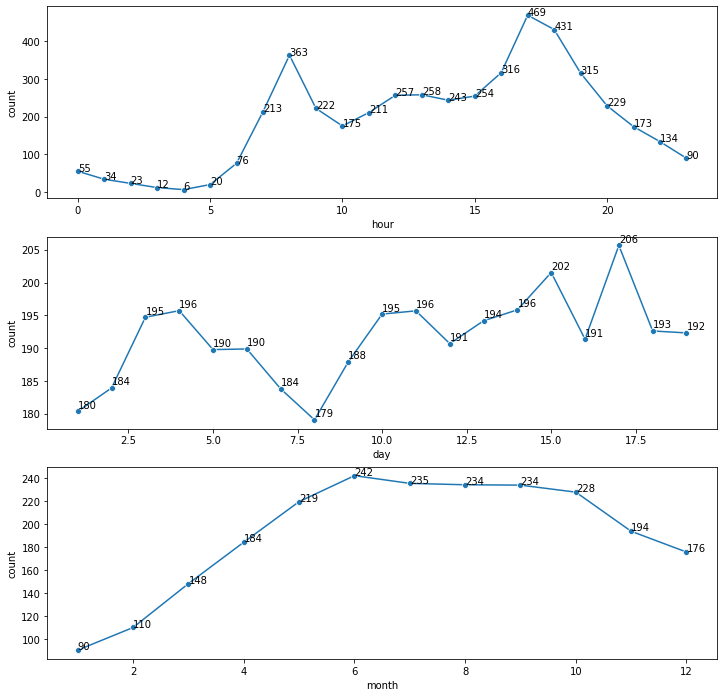

In [139]:
fig, axes = plt.subplots(3, figsize=(12,12))

data = df[['hour', 'count']].groupby('hour').mean().reset_index()
for i, row in data.iterrows():
    temp = row['count']
    axes[0].text(row['hour'], row['count']+0.5, f'{temp:.0f}')
sns.lineplot(x=data['hour'], y=data['count'], marker="o", ax=axes[0])
data = df[['day', 'count']].groupby('day').mean().reset_index()
for i, row in data.iterrows():
    temp = row['count']
    axes[1].text(row['day'], row['count']+0.5, f'{temp:.0f}')
sns.lineplot(x=data['day'], y=data['count'], marker="o", ax=axes[1])
data = df[['month', 'count']].groupby('month').mean().reset_index()
for i, row in data.iterrows():
    temp = row['count']
    axes[2].text(row['month'], row['count']+0.5, f'{temp:.0f}')
sns.lineplot(x=data['month'], y=data['count'], marker="o", ax=axes[2])

plt.show()

## Analysis of Time Factors
1. Hour: There is morning/everning peak with higher usage. At noon, there is a local maximum as well.
2. Day: The dataset does not include every day of a month. 
3. Month: The summer and autumn result in higher usages.